## Data preparation

### Combining data from 2 post

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB







pd.set_option('display.max_columns', 200)

In [2]:
# import .csv file to df
df_1 = pd.read_csv('../data/gameOfthrones.csv')
df_2 = pd.read_csv('../data/dragon.csv')

In [3]:
# Combine the two dataframes into one dataframe name df
df = pd.concat([df_1, df_2], axis=0)

In [4]:
df.shape

(14701, 117)

In [5]:
# Checking all the posts that was scraped
df['subreddit'].value_counts(normalize=True)

subreddit
HouseOfTheDragon    0.500306
gameofthrones       0.499694
Name: proportion, dtype: float64

### Data cleansing and covert class to binary

In [6]:
df['title'].duplicated().sum()

12808

In [7]:
# drop all title duplicates and create new dataframe
df_no_dup = df.drop_duplicates(subset='title')

In [8]:
# Check what still remains after drop duplicates
df_no_dup.shape


(1893, 117)

In [9]:
# keep only the columns that are needed. Title, subreddit, and selftext
df_no_dup = df_no_dup[['title', 'subreddit', 'selftext']]

In [10]:
# Check for null values
df_no_dup.isnull().sum()

title          0
subreddit      0
selftext     702
dtype: int64

In [11]:
# drop the empty selftext rows
df_no_dup.dropna(inplace=True)

In [12]:
# shape of df after dropping null values
df_no_dup.shape

(1191, 3)

In [13]:
# Convert subreddit column to binary. Game of thrones = 1, Dragon Age = 0
df_no_dup['subreddit'] = df_no_dup['subreddit'].map({'gameofthrones': 1, 'HouseOfTheDragon': 0})

In [14]:
# reset index of dataframe
df_no_dup.reset_index(drop=True, inplace=True)

In [15]:
# Baseline score (1 = Game of thrones, 0 = House of the dragon)
df_no_dup['subreddit'].value_counts(normalize=True)

subreddit
0    0.50042
1    0.49958
Name: proportion, dtype: float64

## EDA and Data pre-processing

### Text features exploration

In [16]:
# Prepare X and y
X = df_no_dup[['title','selftext']]
y = df_no_dup['subreddit']



#### Count Vecterized method

In [17]:
# Instantiate a CounterVectorizer with english stop words
cvec = CountVectorizer(stop_words='english')
# using columntransformer to Counter Vec the selftext column and title column
column_transformer = ColumnTransformer(
     transformers=[
         ('title_cvec', cvec, 'title'),
         ('text_cvec', cvec, 'selftext')], n_jobs=-1
 )

X_cvec = column_transformer.fit_transform(X)


In [18]:
# convert X_train_cvec to a dataframe call X_df_cvec
X_df_cvec = pd.DataFrame(X_cvec.toarray(), columns=column_transformer.get_feature_names_out())
X_df_cvec.head()

,title_cvec__09,title_cvec__10,title_cvec__100,title_cvec__17,title_cvec__180,title_cvec__1x02,title_cvec__1x07,title_cvec__1x08,title_cvec__20,title_cvec__2023,title_cvec__2024,title_cvec__2nd,title_cvec__3d,title_cvec__3m,title_cvec__40,title_cvec__4ft6,title_cvec__4th,title_cvec__6ft4,title_cvec__6th,title_cvec__75,title_cvec__9m,title_cvec__abandon,title_cvec__abdicated,title_cvec__ability,title_cvec__able,title_cvec__absence,title_cvec__absences,title_cvec__absolutely,title_cvec__abubakar,title_cvec__accept,title_cvec__accepted,title_cvec__accordance,title_cvec__accurate,title_cvec__acknowledged,title_cvec__acknowledging,title_cvec__act,title_cvec__acting,title_cvec__action,title_cvec__actions,title_cvec__actor,title_cvec__actors,title_cvec__actual,title_cvec__actually,title_cvec__adaptation,title_cvec__add,title_cvec__added,title_cvec__addicts,title_cvec__additional,title_cvec__admire,title_cvec__admit,title_cvec__advantage,title_cvec__advent,title_cvec__advice,title_cvec__advisers,title_cvec__advisors,title_cvec__aegon,title_cvec__aemma,title_cvec__aemon,title_cvec__aemond,title_cvec__aemonds,title_cvec__aerys,title_cvec__aesthetic,title_cvec__affected,title_cvec__age,title_cvec__aged,title_cvec__ages,title_cvec__ago,title_cvec__agree,title_cvec__agreed,title_cvec__air,title_cvec__aired,title_cvec__airtime,title_cvec__aka,title_cvec__alan,title_cvec__alaska,title_cvec__albertinoflorenziano_arts,title_cvec__ale,title_cvec__alicent,title_cvec__alive,title_cvec__alleged,title_cvec__allegiances,title_cvec__alliances,title_cvec__allies,title_cvec__altering,title_cvec__alternate,title_cvec__alternative,title_cvec__aly,title_cvec__alyn,title_cvec__alys,title_cvec__alyssa,title_cvec__amazing,title_cvec__amp,title_cvec__anchorage,title_cvec__andal,title_cvec__angry,title_cvec__anguy,title_cvec__animated,title_cvec__animation,title_cvec__announce,title_cvec__announced,...,text_cvec__worsened,text_cvec__worship,text_cvec__worshiping,text_cvec__worst,text_cvec__worth,text_cvec__worthless,text_cvec__worthy,text_cvec__woulda,text_cvec__wouldn,text_cvec__wouldnt,text_cvec__wound,text_cvec__wounds,text_cvec__wow,text_cvec__wpdw1k,text_cvec__wqpoem3y0dvb1,text_cvec__wraiths,text_cvec__wrangling,text_cvec__wrap,text_cvec__wrath,text_cvec__wrecked,text_cvec__wrestle,text_cvec__wrestler,text_cvec__wrestlers,text_cvec__wrestling,text_cvec__wretches,text_cvec__wrinkle,text_cvec__write,text_cvec__writer,text_cvec__writers,text_cvec__writes,text_cvec__writing,text_cvec__written,text_cvec__writter,text_cvec__writters,text_cvec__writting,text_cvec__wrong,text_cvec__wrongful,text_cvec__wrote,text_cvec__wshqh7qo7oob1,text_cvec__wtf,text_cvec__wun,text_cvec__wuns,text_cvec__ww,text_cvec__wwe,text_cvec__wws,text_cvec__www,text_cvec__wyatt,text_cvec__wylde,text_cvec__wyvern,text_cvec__x200b,text_cvec__x6hc57splzwb1,text_cvec__xd,text_cvec__xenophobia,text_cvec__xxoaf3kq7suw1kyofpbzd2xa9sqwmyl70jpf8g3jcaw,text_cvec__yall,text_cvec__yalls,text_cvec__yandel,text_cvec__yang,text_cvec__yap,text_cvec__yara,text_cvec__yard,text_cvec__yarn,text_cvec__yass,text_cvec__yay,text_cvec__yea,text_cvec__yeah,text_cvec__year,text_cvec__years,text_cvec__yell,text_cvec__yep,text_cvec__yes,text_cvec__yesss,text_cvec__yesterday,text_cvec__ygritte,text_cvec__yin,text_cvec__yno4udp42aqb1,text_cvec__yohn,text_cvec__yore,text_cvec__young,text_cvec__younger,text_cvec__youngest,text_cvec__youre,text_cvec__youth,text_cvec__youtu,text_cvec__youtube,text_cvec__yqbmuy6t0iub1,text_cvec__yronwood,text_cvec__yrs,text_cvec__yt,text_cvec__ywvq_x2sqqe,text_cvec__zdwglyyrb2ob1,text_cvec__zealous,text_cvec__zeitgeist,text_cvec__zero,text_cvec__zlb9qleu0dqb1,text_cvec__zombie,text_cvec__zombies,text_cvec__zombified,text_cvec__zoom,text_cvec__zsnyhrszd9ztdopj
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<Axes: >

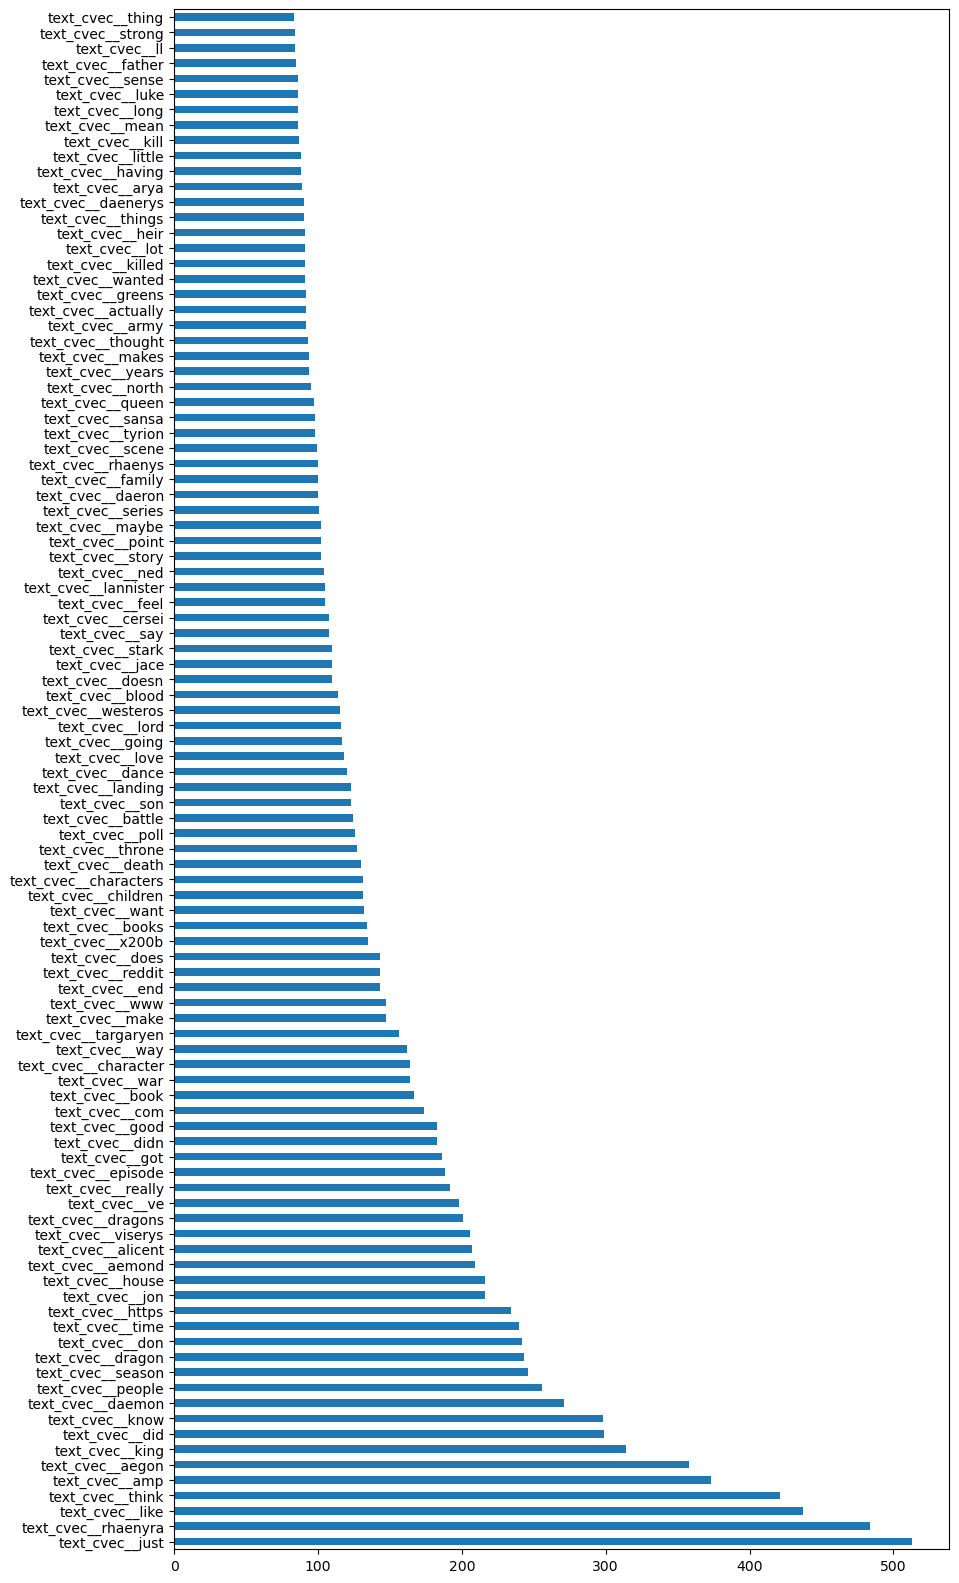

In [19]:
# See the frequency of words in the title column
plt.figure(figsize=(10,20))
X_df_cvec.sum().sort_values(ascending=False).head(100).plot(kind='barh')

In [20]:
# add unique most frequent words to stop words
custom_stop_words = ['rhaenyra', 'daemon','viserys','daeron', 'rhaenys','tyrion','sansa','daenerys','arya','cercei']

#### Term Frequency-Inverse Document Frequency (TF-IDF)Vecterzied method

In [21]:
# Instantiate a TfidVectorizer with english stop words
tvec = TfidfVectorizer(stop_words='english')
# using columntransformer to Counter Vec the selftext column and title column
column2_transformer = ColumnTransformer(
     transformers=[
         ('title_tvec', tvec, 'title'),
         ('text_tvec', tvec, 'selftext')], n_jobs=-1
 )

X_tvec = column_transformer.fit_transform(X)


In [22]:
# convert X_train_tvec to a dataframe call X_df_tvec
X_df_tvec = pd.DataFrame(X_tvec.toarray(), columns=column_transformer.get_feature_names_out())
X_df_tvec.head()

,title_cvec__09,title_cvec__10,title_cvec__100,title_cvec__17,title_cvec__180,title_cvec__1x02,title_cvec__1x07,title_cvec__1x08,title_cvec__20,title_cvec__2023,title_cvec__2024,title_cvec__2nd,title_cvec__3d,title_cvec__3m,title_cvec__40,title_cvec__4ft6,title_cvec__4th,title_cvec__6ft4,title_cvec__6th,title_cvec__75,title_cvec__9m,title_cvec__abandon,title_cvec__abdicated,title_cvec__ability,title_cvec__able,title_cvec__absence,title_cvec__absences,title_cvec__absolutely,title_cvec__abubakar,title_cvec__accept,title_cvec__accepted,title_cvec__accordance,title_cvec__accurate,title_cvec__acknowledged,title_cvec__acknowledging,title_cvec__act,title_cvec__acting,title_cvec__action,title_cvec__actions,title_cvec__actor,title_cvec__actors,title_cvec__actual,title_cvec__actually,title_cvec__adaptation,title_cvec__add,title_cvec__added,title_cvec__addicts,title_cvec__additional,title_cvec__admire,title_cvec__admit,title_cvec__advantage,title_cvec__advent,title_cvec__advice,title_cvec__advisers,title_cvec__advisors,title_cvec__aegon,title_cvec__aemma,title_cvec__aemon,title_cvec__aemond,title_cvec__aemonds,title_cvec__aerys,title_cvec__aesthetic,title_cvec__affected,title_cvec__age,title_cvec__aged,title_cvec__ages,title_cvec__ago,title_cvec__agree,title_cvec__agreed,title_cvec__air,title_cvec__aired,title_cvec__airtime,title_cvec__aka,title_cvec__alan,title_cvec__alaska,title_cvec__albertinoflorenziano_arts,title_cvec__ale,title_cvec__alicent,title_cvec__alive,title_cvec__alleged,title_cvec__allegiances,title_cvec__alliances,title_cvec__allies,title_cvec__altering,title_cvec__alternate,title_cvec__alternative,title_cvec__aly,title_cvec__alyn,title_cvec__alys,title_cvec__alyssa,title_cvec__amazing,title_cvec__amp,title_cvec__anchorage,title_cvec__andal,title_cvec__angry,title_cvec__anguy,title_cvec__animated,title_cvec__animation,title_cvec__announce,title_cvec__announced,...,text_cvec__worsened,text_cvec__worship,text_cvec__worshiping,text_cvec__worst,text_cvec__worth,text_cvec__worthless,text_cvec__worthy,text_cvec__woulda,text_cvec__wouldn,text_cvec__wouldnt,text_cvec__wound,text_cvec__wounds,text_cvec__wow,text_cvec__wpdw1k,text_cvec__wqpoem3y0dvb1,text_cvec__wraiths,text_cvec__wrangling,text_cvec__wrap,text_cvec__wrath,text_cvec__wrecked,text_cvec__wrestle,text_cvec__wrestler,text_cvec__wrestlers,text_cvec__wrestling,text_cvec__wretches,text_cvec__wrinkle,text_cvec__write,text_cvec__writer,text_cvec__writers,text_cvec__writes,text_cvec__writing,text_cvec__written,text_cvec__writter,text_cvec__writters,text_cvec__writting,text_cvec__wrong,text_cvec__wrongful,text_cvec__wrote,text_cvec__wshqh7qo7oob1,text_cvec__wtf,text_cvec__wun,text_cvec__wuns,text_cvec__ww,text_cvec__wwe,text_cvec__wws,text_cvec__www,text_cvec__wyatt,text_cvec__wylde,text_cvec__wyvern,text_cvec__x200b,text_cvec__x6hc57splzwb1,text_cvec__xd,text_cvec__xenophobia,text_cvec__xxoaf3kq7suw1kyofpbzd2xa9sqwmyl70jpf8g3jcaw,text_cvec__yall,text_cvec__yalls,text_cvec__yandel,text_cvec__yang,text_cvec__yap,text_cvec__yara,text_cvec__yard,text_cvec__yarn,text_cvec__yass,text_cvec__yay,text_cvec__yea,text_cvec__yeah,text_cvec__year,text_cvec__years,text_cvec__yell,text_cvec__yep,text_cvec__yes,text_cvec__yesss,text_cvec__yesterday,text_cvec__ygritte,text_cvec__yin,text_cvec__yno4udp42aqb1,text_cvec__yohn,text_cvec__yore,text_cvec__young,text_cvec__younger,text_cvec__youngest,text_cvec__youre,text_cvec__youth,text_cvec__youtu,text_cvec__youtube,text_cvec__yqbmuy6t0iub1,text_cvec__yronwood,text_cvec__yrs,text_cvec__yt,text_cvec__ywvq_x2sqqe,text_cvec__zdwglyyrb2ob1,text_cvec__zealous,text_cvec__zeitgeist,text_cvec__zero,text_cvec__zlb9qleu0dqb1,text_cvec__zombie,text_cvec__zombies,text_cvec__zombified,text_cvec__zoom,text_cvec__zsnyhrszd9ztdopj
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<Axes: >

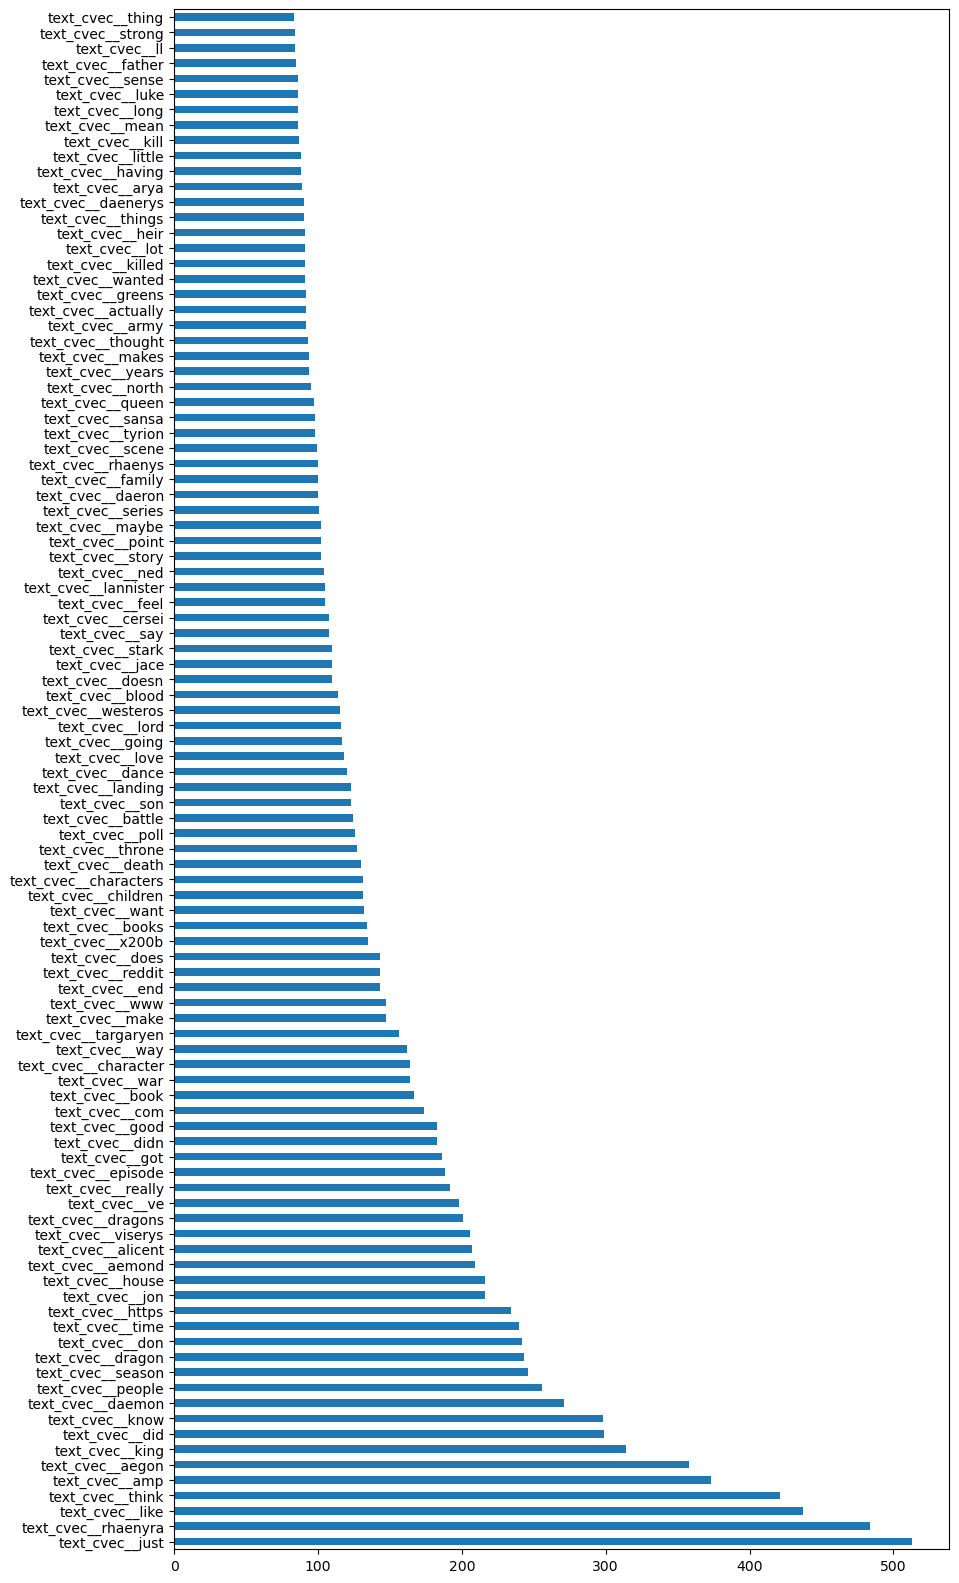

In [23]:
# See the frequency of words in the title column
plt.figure(figsize=(10,20))
X_df_cvec.sum().sort_values(ascending=False).head(100).plot(kind='barh')

In [24]:
# The unique appear less in here. Can use same custom stop word

## Modelling


### Look for the best estimator for CounterVectorize and TfidVectorize. Apply to 7 classification model and record data for evaluation

In [25]:
# Using only colume "title" to find the score for model, before optimize the vectorizer further
X = df_no_dup['title']
y = df_no_dup['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [26]:
# Create dataframe to contain record CounterVectorize from each model
df_class = pd.DataFrame(columns=['Test Accuracy','Train Accuracy','Test Precision', 'Train Precision','Test Sensitivity','Train Sensitivity', 'Test f1_score', 'Train f1_score'], index=['LogisticRegression_C', 'KNeighborsClassifier_C', 'NaiveBayes_C','Bagging_C', 'RandomForestClassifier_C', 'AdaBoostClassifier_C', 'support vector_C'])

In [27]:
# Use gridsearch to find best estimator for CounterVectorizer for each model
model_class = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), MultinomialNB(), BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(),SVC()]
vec_param = {
    'cvec__max_df': [.9, .95, 1.0],
    'cvec__min_df': [1, 2, 3, 4, 5],
    'cvec__max_features': [3000,5000,7500,10000,11000],
    }

for i in range(0,7):
    pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', model_class[i])
    ])
    grid = GridSearchCV(pipe, param_grid=vec_param, cv=5)
    grid.fit(X_train, y_train)

# record result to dataframe
    df_class.iloc[i,0] = accuracy_score(y_test, grid.predict(X_test))
    df_class.iloc[i,1] = accuracy_score(y_train, grid.predict(X_train))
    df_class.iloc[i,2] = precision_score(y_test, grid.predict(X_test))
    df_class.iloc[i,3] = precision_score(y_train, grid.predict(X_train))
    df_class.iloc[i,4] = recall_score(y_test, grid.predict(X_test))
    df_class.iloc[i,5] = recall_score(y_train, grid.predict(X_train))
    df_class.iloc[i,6] = f1_score(y_test, grid.predict(X_test))
    df_class.iloc[i,7] = f1_score(y_train, grid.predict(X_train))



In [28]:
# Evaluate the model of CounterVectorizer
df_class['acc_diff']=df_class['Train Accuracy']-df_class['Test Accuracy']
df_class['prec_diff']=df_class['Train Precision']-df_class['Test Precision']
df_class['sens_diff']=df_class['Train Sensitivity']-df_class['Test Sensitivity']
df_class['f1_diff']=df_class['Train f1_score']-df_class['Test f1_score']

df_class

,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score,acc_diff,prec_diff,sens_diff,f1_diff
LogisticRegression_C,0.775168,0.982083,0.746988,0.975664,0.832215,0.988789,0.787302,0.982183,0.206915,0.228676,0.156574,0.194881
KNeighborsClassifier_C,0.637584,0.772676,0.643357,0.76129,0.61745,0.793722,0.630137,0.777168,0.135092,0.117934,0.176272,0.147031
NaiveBayes_C,0.798658,0.970885,0.820144,0.970852,0.765101,0.970852,0.791667,0.970852,0.172227,0.150708,0.205751,0.179185
Bagging_C,0.721477,0.979843,0.685393,0.975556,0.818792,0.984305,0.746177,0.979911,0.258367,0.290162,0.165513,0.233733
RandomForestClassifier_C,0.758389,1.0,0.722543,1.0,0.838926,1.0,0.776398,1.0,0.241611,0.277457,0.161074,0.223602
AdaBoostClassifier_C,0.711409,0.807391,0.652174,0.732993,0.90604,0.966368,0.758427,0.833656,0.095981,0.080819,0.060327,0.075229
support vector_C,0.775168,0.970885,0.732955,0.952586,0.865772,0.991031,0.793846,0.971429,0.195717,0.219632,0.12526,0.177582


In [29]:
# Create dataframe to contain record Tfidvectorizee from each model
df_class_t = pd.DataFrame(columns=['Test Accuracy','Train Accuracy','Test Precision', 'Train Precision','Test Sensitivity','Train Sensitivity', 'Test f1_score', 'Train f1_score'], index=['LogisticRegression_T', 'KNeighborsClassifier_T', 'NaiveBayes_T','Bagging_T', 'RandomForestClassifier_T', 'AdaBoostClassifier_T', 'support vector_T'])

In [30]:
# Use gridsearch to find best estimator for TfidVectorizer for each model
model_class = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), MultinomialNB(), BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(),SVC()]
vec_param = {
    'tvec__max_df': [.9, .95, 1.0],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_features': [3000,5000,7500,10000,11000],
    }

for i in range(0,7):
    pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', model_class[i])
    ])
    grid = GridSearchCV(pipe, param_grid=vec_param, cv=5)
    grid.fit(X_train, y_train)

# add result to dataframe
    df_class_t.iloc[i,0] = accuracy_score(y_test, grid.predict(X_test))
    df_class_t.iloc[i,1] = accuracy_score(y_train, grid.predict(X_train))
    df_class_t.iloc[i,2] = precision_score(y_test, grid.predict(X_test))
    df_class_t.iloc[i,3] = precision_score(y_train, grid.predict(X_train))
    df_class_t.iloc[i,4] = recall_score(y_test, grid.predict(X_test))
    df_class_t.iloc[i,5] = recall_score(y_train, grid.predict(X_train))
    df_class_t.iloc[i,6] = f1_score(y_test, grid.predict(X_test))
    df_class_t.iloc[i,7] = f1_score(y_train, grid.predict(X_train))

In [31]:
# Evaluate model of TfidVectorizer
df_class_t['acc_diff']=df_class_t['Train Accuracy']-df_class_t['Test Accuracy']
df_class_t['prec_diff']=df_class_t['Train Precision']-df_class_t['Test Precision']
df_class_t['sens_diff']=df_class_t['Train Sensitivity']-df_class_t['Test Sensitivity']
df_class_t['f1_diff']=df_class_t['Train f1_score']-df_class_t['Test f1_score']

df_class_t


,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score,acc_diff,prec_diff,sens_diff,f1_diff
LogisticRegression_T,0.785235,0.965286,0.767296,0.95207,0.818792,0.979821,0.792208,0.965746,0.180051,0.184774,0.161029,0.173538
KNeighborsClassifier_T,0.718121,0.833147,0.721088,0.857831,0.711409,0.798206,0.716216,0.826945,0.115026,0.136743,0.086797,0.110729
NaiveBayes_T,0.795302,0.969765,0.809859,0.964523,0.771812,0.975336,0.790378,0.9699,0.174463,0.154664,0.203524,0.179522
Bagging_T,0.711409,0.984323,0.695652,0.975771,0.751678,0.993274,0.722581,0.984444,0.272913,0.280119,0.241596,0.261864
RandomForestClassifier_T,0.755034,1.0,0.723529,1.0,0.825503,1.0,0.77116,1.0,0.244966,0.276471,0.174497,0.22884
AdaBoostClassifier_T,0.711409,0.819709,0.661538,0.745267,0.865772,0.970852,0.75,0.843233,0.108299,0.083728,0.10508,0.093233
support vector_T,0.785235,0.99888,0.757576,1.0,0.838926,0.997758,0.796178,0.998878,0.213645,0.242424,0.158832,0.202699


In [32]:
# Put df_class_t after df_class
df_class_combine = pd.concat([df_class, df_class_t], axis=0)
df_class_combine

,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score,acc_diff,prec_diff,sens_diff,f1_diff
LogisticRegression_C,0.775168,0.982083,0.746988,0.975664,0.832215,0.988789,0.787302,0.982183,0.206915,0.228676,0.156574,0.194881
KNeighborsClassifier_C,0.637584,0.772676,0.643357,0.76129,0.61745,0.793722,0.630137,0.777168,0.135092,0.117934,0.176272,0.147031
NaiveBayes_C,0.798658,0.970885,0.820144,0.970852,0.765101,0.970852,0.791667,0.970852,0.172227,0.150708,0.205751,0.179185
Bagging_C,0.721477,0.979843,0.685393,0.975556,0.818792,0.984305,0.746177,0.979911,0.258367,0.290162,0.165513,0.233733
RandomForestClassifier_C,0.758389,1.0,0.722543,1.0,0.838926,1.0,0.776398,1.0,0.241611,0.277457,0.161074,0.223602
AdaBoostClassifier_C,0.711409,0.807391,0.652174,0.732993,0.90604,0.966368,0.758427,0.833656,0.095981,0.080819,0.060327,0.075229
support vector_C,0.775168,0.970885,0.732955,0.952586,0.865772,0.991031,0.793846,0.971429,0.195717,0.219632,0.12526,0.177582
LogisticRegression_T,0.785235,0.965286,0.767296,0.95207,0.818792,0.979821,0.792208,0.965746,0.180051,0.184774,0.161029,0.173538
KNeighborsClassifier_T,0.718121,0.833147,0.721088,0.857831,0.711409,0.798206,0.716216,0.826945,0.115026,0.136743,0.086797,0.110729
NaiveBayes_T,0.795302,0.969765,0.809859,0.964523,0.771812,0.975336,0.790378,0.9699,0.174463,0.154664,0.203524,0.179522


### Model and Feature optimization

##### Model selection for further optimization

From the df_class_combine, where the resulf of all model are recorded. 
- AdaBoost with CounterVectorizer is the model with least overfitting. F1 score differences between train and test is the least.
- Support Vector with TfidVectorizer is the model with best test F1 score

I'm taking these 2 models to explore further 

##### AdaBoost with CounterVecterize optimization

In [33]:
# Using only colume "title" to find the score for model, before optimize the vectorizer further
X = df_no_dup['title']
y = df_no_dup['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [34]:
# Obtain the best parameter of CounterVectorizer for AdaboostClassifier model
vec_param = {
    'cvec__max_df': [.9, .95, 1.0],
    'cvec__min_df': [1, 2, 3, 4, 5],
    'cvec__max_features': [3000,5000,7500,10000,11000],
    }
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ada', AdaBoostClassifier())
    ])
grid = GridSearchCV(pipe, param_grid=vec_param, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 4}

In [35]:
#Add custom stop words to the stop words list
stop_words = stopwords.words('english')
stop_words.extend(custom_stop_words)

In [36]:
# Start optimize AdaBoostClassifier model by using Pipeline and GridSearchCV. 
# We have the best parameter for CounterVectorizer and custom stop words from previous step

# Prepare X and y
X = df_no_dup[['title','selftext']]
y = df_no_dup['subreddit']

# Using columntransformer to Counter Vec the selftext column and title column
cvec = CountVectorizer(stop_words=custom_stop_words, max_df=0.9, max_features=3000, min_df=4)

column_transformer = ColumnTransformer(
     transformers=[
         ('title_cvec', cvec, 'title'),
         ('text_cvec', cvec, 'selftext')], n_jobs=-1
 )

X_cvec = column_transformer.fit_transform(X)


In [37]:
X_cvec  

<1191x3168 sparse matrix of type '<class 'numpy.int64'>'
	with 75418 stored elements in Compressed Sparse Row format>

In [38]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_cvec, y, random_state=42, stratify=y)

In [39]:
# AdaBoostClassifier model optimization by GridSearchCV
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier())

ada_params = {
        'n_estimators': [40,50,75,100],
        'estimator__max_depth': [1,2,3,4],
        'learning_rate': [0.9,1,1.1],
        'algorithm': ['SAMME', 'SAMME.R']

        }

grid = GridSearchCV(ada, param_grid=ada_params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator__max_depth': [1, 2, 3, 4],
                         'learning_rate': [0.9, 1, 1.1],
                         'n_estimators': [40, 50, 75, 100]})

In [40]:
# best parameter for AdaBoostClassifier model
grid.best_params_

{'algorithm': 'SAMME',
 'estimator__max_depth': 4,
 'learning_rate': 1.1,
 'n_estimators': 100}

In [41]:
# Create dataframe to contain record
df_result = pd.DataFrame(columns=['Test Accuracy','Train Accuracy','Test Precision', 'Train Precision','Test Sensitivity','Train Sensitivity', 'Test f1_score', 'Train f1_score'], index=['AdaBoostClassifier_C'])


In [42]:
# Add the score to dataframe
df_result.iloc[0,0] = accuracy_score(y_test, grid.predict(X_test))
df_result.iloc[0,1] = accuracy_score(y_train, grid.predict(X_train))
df_result.iloc[0,2] = precision_score(y_test, grid.predict(X_test))
df_result.iloc[0,3] = precision_score(y_train, grid.predict(X_train))
df_result.iloc[0,4] = recall_score(y_test, grid.predict(X_test))
df_result.iloc[0,5] = recall_score(y_train, grid.predict(X_train))
df_result.iloc[0,6] = f1_score(y_test, grid.predict(X_test))
df_result.iloc[0,7] = f1_score(y_train, grid.predict(X_train))

df_result


,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score
AdaBoostClassifier_C,0.805369,0.99776,0.772455,0.995536,0.865772,1.0,0.816456,0.997763


In [43]:
# Get predictions
predictions = grid.predict(X_test)
predictions
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

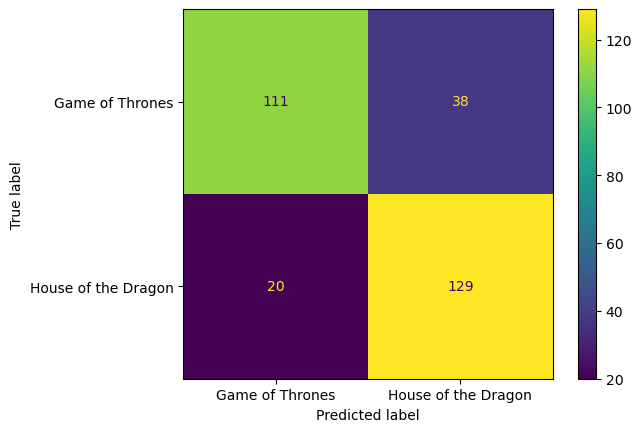

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=['Game of Thrones','House of the Dragon'])
disp.plot()

##### Support Vector Machines with TfidVectorized

In [45]:
# Using only colume "title" to find the score for model, before optimize the vectorizer further
X = df_no_dup['title']
y = df_no_dup['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [46]:
# Obtain the best parameter of TfidVecotrized for SVM model
tec_param = {
    'tvec__max_df': [.9, .95, 1.0],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_features': [3000,5000,7500,10000,11000],
    }
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('SVC', SVC())
    ])
grid = GridSearchCV(pipe, param_grid=tec_param, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'tvec__max_df': 0.9, 'tvec__max_features': 3000, 'tvec__min_df': 1}

In [47]:
# Split before optimize SVM model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [48]:
# Start optimize SMV model by using Pipeline and GridSearchCV. 
# We have the best parameter for TfidVectorize and custom stop words from previous step

# Prepare X and y
X = df_no_dup[['title','selftext']]
y = df_no_dup['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Using columntransformer to Counter Vec the selftext column and title column
tvec = TfidfVectorizer(stop_words=custom_stop_words, max_df=0.9, max_features=3000, min_df=1)

column_transformer = ColumnTransformer(
     transformers=[
         ('title_tvec', cvec, 'title'),
         ('text_tvec', cvec, 'selftext')], n_jobs=-1
 )

X_tvec = column_transformer.fit_transform(X_train)
X_test_tvec = column_transformer.transform(X_test)

In [50]:
# Split the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X_tvec, y, random_state=42, stratify=y)

In [51]:
# SVC model optimization by GridSearchCV
svc = SVC()

pgrid = {"C": np.linspace(0.0001, 1, 20)}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(svc, param_grid=pgrid, cv=cv)
grid.fit(X_tvec, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00])})

In [52]:
# Get predictions
predictions = grid.predict(X_test_tvec)
predictions
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [70]:
# obtain index of X_test_tvec


AttributeError: 'csr_matrix' object has no attribute 'index'

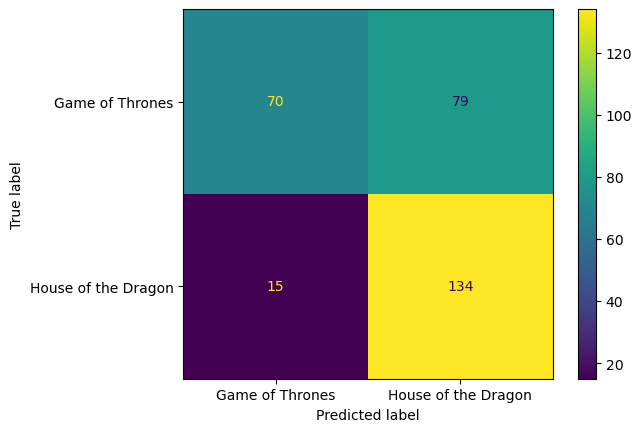

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=['Game of Thrones','House of the Dragon'])
disp.plot()

Combine result and evaluate

In [56]:
# Add new row to df_result
df_result.loc['support vector_T'] = [accuracy_score(y_test, grid.predict(X_test_tvec)), accuracy_score(y_train, grid.predict(X_tvec)), precision_score(y_test, grid.predict(X_test_tvec)), precision_score(y_train, grid.predict(X_tvec)), recall_score(y_test, grid.predict(X_test_tvec)), recall_score(y_train, grid.predict(X_tvec)), f1_score(y_test, grid.predict(X_test_tvec)), f1_score(y_train, grid.predict(X_tvec))]

In [57]:
df_result

,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score
AdaBoostClassifier_C,0.805369,0.99776,0.772455,0.995536,0.865772,1.0,0.816456,0.997763
support vector_T,0.684564,0.782755,0.629108,0.697492,0.899329,0.997758,0.740331,0.821033


In [58]:
df_class_combine_F = df_class_combine[df_class_combine.index.str.contains('AdaBoostClassifier_C') | df_class_combine.index.str.contains('support vector_T')];
df_class_combine_F.drop(columns=['acc_diff','prec_diff','sens_diff','f1_diff'], inplace=True);
df_class_combine_F

/var/folders/qf/0_xh66cs0m9g2v1qvggq9znh0000gn/T/ipykernel_5887/1628104396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_combine_F.drop(columns=['acc_diff','prec_diff','sens_diff','f1_diff'], inplace=True);


,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score
AdaBoostClassifier_C,0.711409,0.807391,0.652174,0.732993,0.90604,0.966368,0.758427,0.833656
support vector_T,0.785235,0.99888,0.757576,1.0,0.838926,0.997758,0.796178,0.998878


After vectorization optimizing, and best parameter search, The result looks better.
- AdaBoost shows less overfitting. 
- Support Vector test score is improve, as well as the overfitting.

## Final model selection and conclusion

### The selected model is AdaBoost
- This model show the least overfitting
- Where Accuracy, Precision, Sensitivity, and F1 score are doing okay.

In [59]:
## result for intepretation
# step 1 result
df_class_combine

,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score,acc_diff,prec_diff,sens_diff,f1_diff
LogisticRegression_C,0.775168,0.982083,0.746988,0.975664,0.832215,0.988789,0.787302,0.982183,0.206915,0.228676,0.156574,0.194881
KNeighborsClassifier_C,0.637584,0.772676,0.643357,0.76129,0.61745,0.793722,0.630137,0.777168,0.135092,0.117934,0.176272,0.147031
NaiveBayes_C,0.798658,0.970885,0.820144,0.970852,0.765101,0.970852,0.791667,0.970852,0.172227,0.150708,0.205751,0.179185
Bagging_C,0.721477,0.979843,0.685393,0.975556,0.818792,0.984305,0.746177,0.979911,0.258367,0.290162,0.165513,0.233733
RandomForestClassifier_C,0.758389,1.0,0.722543,1.0,0.838926,1.0,0.776398,1.0,0.241611,0.277457,0.161074,0.223602
AdaBoostClassifier_C,0.711409,0.807391,0.652174,0.732993,0.90604,0.966368,0.758427,0.833656,0.095981,0.080819,0.060327,0.075229
support vector_C,0.775168,0.970885,0.732955,0.952586,0.865772,0.991031,0.793846,0.971429,0.195717,0.219632,0.12526,0.177582
LogisticRegression_T,0.785235,0.965286,0.767296,0.95207,0.818792,0.979821,0.792208,0.965746,0.180051,0.184774,0.161029,0.173538
KNeighborsClassifier_T,0.718121,0.833147,0.721088,0.857831,0.711409,0.798206,0.716216,0.826945,0.115026,0.136743,0.086797,0.110729
NaiveBayes_T,0.795302,0.969765,0.809859,0.964523,0.771812,0.975336,0.790378,0.9699,0.174463,0.154664,0.203524,0.179522


In [60]:
# step 1 selection
df_class_combine_F

,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score
AdaBoostClassifier_C,0.711409,0.807391,0.652174,0.732993,0.90604,0.966368,0.758427,0.833656
support vector_T,0.785235,0.99888,0.757576,1.0,0.838926,0.997758,0.796178,0.998878


In [61]:
# step 2 result
df_result

,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Sensitivity,Train Sensitivity,Test f1_score,Train f1_score
AdaBoostClassifier_C,0.805369,0.99776,0.772455,0.995536,0.865772,1.0,0.816456,0.997763
support vector_T,0.684564,0.782755,0.629108,0.697492,0.899329,0.997758,0.740331,0.821033


In [62]:
# y_test
y_test.shape


(298,)

Check the actual text of prediction

In [110]:
# turn X_test into dataframe
X_test = pd.DataFrame(X_test)

#reset index of X_test
X_test.reset_index(drop=True, inplace=True)

#reset index of y_test
y_test.reset_index(drop=True, inplace=True)

# turn predictions into dataframe
predictions_df = pd.DataFrame(predictions, columns=['predictions'])

# turn y_test into dataframe
y_test_df = pd.DataFrame(y_test)

# combine X_test, y_test, predictions into one dataframe
df_test = pd.concat([X_test, y_test_df, predictions_df], axis=1)



In [112]:
# add colum of difference between y_test and predictions
df_test['diff'] = df_test['subreddit'] - df_test['predictions']

In [121]:
# Check the "wrong" predictions
df_test[df_test['diff']!=0]

,title,selftext,subreddit,predictions,diff
13,A list of all the female characters who might ...,Who are all the named (or unnamed) female char...,0,1,-1
16,Who are your top five favorite and least favor...,My favorite characters:\n\n1. Episode 10 Rhae...,0,1,-1
19,Merging Cregan Stark with the Winter Wolves plot,Cregan Stark’s role in the HoTD could be great...,0,1,-1
23,Fashion wishes for S2?,I wish they'd get rid of Rhaenys' conehead. An...,0,1,-1
25,So... are the dragon people part dragon?,I am new to Song of Ice and Fire series. I jus...,1,0,1
...,...,...,...,...,...
275,"I made this little edit a while ago, but it’s ...",Artist link: https://www.deviantart.com/azad-i...,0,1,-1
276,I can’t be the only one who hates his guts,Who do you hate the most so far?,0,1,-1
278,What if Aemma had given birth to a healthy dau...,What do you think would have happened if the b...,0,1,-1
287,My prediction on the 5 new dragons we will see...,Ryan Condal mentioned that we will see 5 new d...,0,1,-1


In [127]:
# print(df_test['selftext'][13])
# print(df_test['selftext'][16])
# print(df_test['selftext'][19])
print(df_test['selftext'][25])

I am new to Song of Ice and Fire series. I just purchased the first book. I watched the entirety of HBO's *Game of Thrones* and *House of Dragons*. So please excuse me if this was already explained. I either missed it or forgot... But are they *literally* dragons? like by evolution? Or human/dragon breeding? Or are the *figuratively* dragons like 'our group of people settled near dragons and by tradition and lineage...'
